**Rasmus Boldvig Rottwitt**

# Introduction

**I chose to answer one of the sample questions given in the assignment, with a slight tweak**

*I’m a business owner! How can I improve my business to increase customer satisfaction? What am I doing right, what am I doing wrong? I want to promote my business, which users/community of users should I try to influence? Who is my target audience?*

The restaurant chosen is the best reviewed restaurant in Toronto - based on a mix of number of reviews and quality of reviews, chosing as an emerging market but also as one of the many markets suffering from Corona Virus drops in customers. Furthermore, out of personal interest, I chose to dive into this reataurant to have a large set of data to dive into. 


# Initialization

### Loading review, business and check-in data

In [7]:
#various initial imports, more imports will be made along the way:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn as sns

from wordcloud import WordCloud

%matplotlib inline

# Packages for general work
import json
import seaborn             as sns
from pprint                import pprint
from datetime import datetime, timedelta
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction import stop_words
import string

from sklearn.decomposition import NMF

# Packages for HTML displaying
from IPython.core.display import display, HTML

# Packages for heatmap
import folium
from folium import plugins
from folium.plugins import HeatMap

### Import 1:  reviews from Yelp

In [9]:
# open input file: 
file = open('Data/yelp_dataset/review.json') 
stop = 5000000 # i load the first 5 million reviews

#empty list for storing all data being loaded
datalist = list()

for i, line in enumerate(file):
    # loading progress function
    if i%100000==0: 
        print(i/10000, end = '')
        
    if i==stop:
        break    
        
    # converting from json to dict, with proper datastructure
    jsondataframe = json.loads(line)
    business      = jsondataframe['business_id']
    user          = jsondataframe['user_id']
    date          = jsondataframe['date']
    text          = jsondataframe['text']
    stars         = jsondataframe['stars']
    
    datalist.append([business, user, date, stars, text])
    
# create the Pandas DataFrame
reviews_df = pd.DataFrame(datalist, columns=['business_id','user_id', 'date','stars','text'])
file.close()

0.010.020.030.040.050.060.070.080.090.0100.0110.0120.0130.0140.0150.0160.0170.0180.0190.0200.0210.0220.0230.0240.0250.0260.0270.0280.0290.0300.0310.0320.0330.0340.0350.0360.0370.0380.0390.0400.0410.0420.0430.0440.0450.0460.0470.0480.0490.0500.0

,business_id,user_id,date,stars,text
0,-MhfebM0QIsKt87iDN-FNw,OwjRMXRC0KyPrIlcjaXeFQ,2015-04-15 05:21:16,2.0,"As someone who has worked with many museums, I..."
1,lbrU8StCq3yDfr-QMnGrmQ,nIJD_7ZXHq-FX8byPMOkMQ,2013-12-07 03:16:52,1.0,I am actually horrified this place is still in...
2,HQl28KMwrEKHqhFrrDqVNQ,V34qejxNsCbcgD8C0HVk-Q,2015-12-05 03:18:11,5.0,I love Deagan's. I do. I really do. The atmosp...
3,5JxlZaqCnk1MnbgRirs40Q,ofKDkJKXSKZXu5xJNGiiBQ,2011-05-27 05:30:52,1.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g..."
4,IS4cv902ykd8wj1TR0N3-A,UgMW8bLE0QMJDCkQ1Ax5Mg,2017-01-14 21:56:57,4.0,"Oh happy day, finally have a Canes near my cas..."


### Import 2: Loading business data and check-in data

In [10]:
with open('Data/yelp_dataset/business.json') as data:
    business_df = pd.DataFrame(json.loads(line) for line in data)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


Furthermore, we will get the business ID of Pai Northern Thai Kitchen through this dataset

In [11]:
# Filtering down to Toronto
toronto_business = business_df[business_df['city'] == 'Toronto']

#Filtering the restaurant based on Name
restaurant = toronto_business[toronto_business['name'] == 'Pai Northern Thai Kitchen'] 
restaurant

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
65694,r_BrIgzYcwo1NAuG9dLbpg,Pai Northern Thai Kitchen,18 Duncan Street,Toronto,ON,M5H 3G8,43.647866,-79.388685,4.5,2758,1,"{'RestaurantsTableService': 'True', 'BikeParki...","Restaurants, Thai, Specialty Food, Food, Ethni...","{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:..."


In [12]:
# saving the restaurant ID for further analysis
restaurantID = "r_BrIgzYcwo1NAuG9dLbpg"

### Import 3: check-ins
all checkins have also been downloaded, and can be iterated through

In [16]:
with open('Data/yelp_dataset/checkin.json') as data:
    checkin_df = pd.DataFrame(json.loads(line) for line in data)
    
#checkin_mybusiness:
checkin_df = checkin_df[checkin_df['business_id']==restaurantID].date.values

checkin_df = ''.join(checkin_df) 
checkin_df = checkin_df.split(", ")  
checkin_df = pd.DataFrame(checkin_df, columns =['dt'])

# Changing the date into a datetime object.
checkin_df['datetime']=checkin_df['dt'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

# Adding year and month column to the dataframe, and converting the time to local Toronto time
checkin_df['TorontoTime'] = checkin_df['datetime'] - timedelta(hours=6)
checkin_df['year']        = checkin_df['TorontoTime'].dt.year
checkin_df['month']       = checkin_df['TorontoTime'].dt.month
checkin_df['weekday']     = checkin_df['TorontoTime'].dt.weekday
checkin_df['hour']        = checkin_df['TorontoTime'].dt.hour
checkin_df['date']        = checkin_df['TorontoTime'].dt.date

# Deleting irrelevant coloumns
del checkin_df['datetime']
del checkin_df['dt']

# Reviews and introduction to the restaurant Pai

Before more in-depth analysis of the restaurant, a bit of work with the dataframe must be done. 

First, the dataset must be joined with the business info fo gain access to info on attributes and categories. 

In [17]:
# Joining whole dataset through merge, on business ID. 
reviews_df = reviews_df.merge(business_df.loc[:,['city','categories','business_id']], on=['business_id'], how='left')

# Generating datetime coloumn for more mutable date-types. 
reviews_df['datetime'] = pd.to_datetime(reviews_df['date'])
del reviews_df['date']

### Focusing on Toronto

To minimize strain on the computer, we will also filter the reviews to the city Toronto, and only on restuarants since they are Pai's competitors

In [18]:
# Filtering reviews on Toronto
torontoreviews = reviews_df[reviews_df['city'] == 'Toronto'] 

# dropping NaN values
torontoreviews = torontoreviews.dropna() 

To filter reviews with matching categories in the next couple of lines, we will initialize a general function for usage throughtout the notebook

In [19]:
def categoryfilter(target,categories): 
    if target in categories:
        return True
    else:
        return False

The matching reviews can then be extracted

In [20]:
# get business IDs of only a particular business types, which has 'Restaurants' as a category
torontoreviews = torontoreviews[torontoreviews.categories.map(lambda x: categoryfilter('Restaurants', x))]
torontoreviews = torontoreviews.reset_index(drop=True) #reseting index

To minimize the size of the dataset, reviews before 2015 are excluded for further analysis. 

In [21]:
torontoreviews = torontoreviews[torontoreviews['datetime'] >= '2015-01-01 01:01:01']

,business_id,user_id,stars,text,city,categories,datetime
0,qUWqjjjfpB2-4P3He5rsKw,TZQSUDDcA4ek5gBd6BzcjA,4.0,"In the heart of Chinatown, I discovered it enr...",Toronto,"Pizza, Italian, Salad, Restaurants",2017-06-06 19:04:10
1,9Eghhu_LzEJgDKNgisf3rg,iFEM16O5BeKvf_AHs6NzUQ,3.0,Was super excited to bring my boyfriend to thi...,Toronto,"Wine Bars, Nightlife, Restaurants, Bars, Beer,...",2016-08-25 16:25:12
4,jM6JjZXFAQQANwdlEwbH3g,IIE2OX5haarGNefY23R8BA,5.0,My absolutely favorite mushroom pizza in the c...,Toronto,"Coffee & Tea, Restaurants, Italian, Food, Cafes",2016-04-23 03:32:19
5,PMPMHHLe9vFzcR67iCjgLA,RRhco4irDXPk5EJmvuwr2w,5.0,Been to this a couple of times. Excellent food...,Toronto,"Lebanese, Kebab, Persian/Iranian, Middle Easte...",2016-01-17 05:23:59
7,NrJSy3dgcXErFtOKGREmnw,is1nHZ4oBqqmBm_mfVyhoQ,4.0,Second brunch visit. Loved the Hash and the Eg...,Toronto,"Pubs, American (Traditional), Bars, American (...",2017-09-08 23:06:29
...,...,...,...,...,...,...,...
263002,PYJKieI6iNYdcNbAwdhTPw,2xed-mTIu9tWxR4R6iA9gw,5.0,Came in for a drink and was greeted by the bar...,Toronto,"Pubs, Nightlife, Food, Restaurants, Beer, Wine...",2016-04-16 19:56:27
263003,aLcFhMe6DDJ430zelCpd2A,uzwDlOQdDOk2MpKAEWw9IQ,5.0,1000+ reviews don't lie! Come here early or if...,Toronto,"Thai, Restaurants",2015-11-23 01:55:42
263004,fN_I3jP7RD2llubTvhXtKQ,UNKArV53AW3bAr4sFB8Z_A,4.0,"The food was amazing, and it sure shows the wa...",Toronto,"Canadian (New), Restaurants, Cafes, Diners, Br...",2017-08-01 18:33:42
263005,Qmwfg-PtYuCo5Q_IwcA_HQ,Ut8TheM5IUfuAOIsRrOlSw,1.0,1. The waitress seems impatient when explainin...,Toronto,"Japanese, Sushi Bars, Restaurants",2017-08-31 06:12:23


# The Restaurant in focus: Pai
Before continuing the focus on Pai, the general classification of the restaurant is explored using categories and values:

In [22]:
categories = business_df[business_df['business_id']==restaurantID].categories.values
print('Categories: ', categories)

Categories:  ['Restaurants, Thai, Specialty Food, Food, Ethnic Food']


Furthermore, every restaurant on Yelp has a long set of attributes or parameters to chose from, rangeing from noise levels, to vibe and practival facilities. 

In [23]:
attributes = business_df[business_df['business_id']==restaurantID].attributes.values
print('Attributes: ',attributes)

Attributes:  [{'RestaurantsTableService': 'True', 'BikeParking': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'RestaurantsReservations': 'True', 'WiFi': "'free'", 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}", 'RestaurantsPriceRange2': '2', 'GoodForKids': 'True', 'RestaurantsAttire': "'casual'", 'NoiseLevel': "u'loud'", 'Alcohol': "'full_bar'", 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': True}", 'RestaurantsTakeOut': 'True', 'HappyHour': 'True', 'BusinessAcceptsCreditCards': 'True', 'DogsAllowed': 'False', 'Caters': 'False', 'BusinessParking': "{'garage': True, 'street': True, 'validated': False, 'lot': True, 'valet': False}", 'HasTV': 'True', 'OutdoorSeating': 'True'}]


In short: Pai is a classy and casual Thai restaurant serving speciality food. 

It is located in Toronto City Center.

In [24]:
Paimap = folium.Map([43.651070, -79.3470157], tiles = "Stamen Toner", zoom_start=11)

folium.Marker([43.647830, -79.389182], popup='Pai Northern Thai Kitchen').add_to(Paimap)
Paimap

# From all reviews to positive/negative reviews

We now focus the reviews to reviews only on Pai

In [25]:
# focusing reviews to only Pai
reviewsPai = torontoreviews[torontoreviews['business_id'] == restaurantID]
reviewsPai = reviewsPai.reset_index(drop=True)

To look at positive and negative reviews sepperately, two subsets of the dataframe have been defined respectively. Since 3 is in the middle, the cut is set to be on 1 and 2 as negative, and 4 and 5 for positive. 

### Dataframe 1: Positive reviews (4 or more stars)

In [26]:
positive_rw = reviewsPai[reviewsPai['stars'] >=4]
positive_rw = positive_rw.reset_index(drop=True) 

### Dataframe 2: Negative reviews (2 or less stars)

In [27]:
negative_rw = reviewsPai[reviewsPai['stars'] <=2]
negative_rw = negative_rw.reset_index(drop=True)# reset index

#### Size of the four datasets
We can now look at the size of our dataframes, to see what size of data we are working on for further analysis. 

In [29]:
# Checkins at Pai
print('Checkin_mybusiness:', len(checkin_df))

# All reviews of Pai
print('Reviews_mybusiness:', len(reviewsPai))

# Positive reviews of Pai
print('Positive_rw:', len(positive_rw))

#Negative reviews of Pai
print('Negative_rw:', len(negative_rw))

Checkin_mybusiness: 3612
Reviews_mybusiness: 2697
Positive_rw: 2340
Negative_rw: 124


We will now be focusing specifically on these two subsets.

To improve efficiency, we will also delete the two initial large dataframes

In [30]:
del reviews_df
del torontoreviews

To gain a better understanding of the reviews of the customers, we will analyze the dataset containing reviews from Yelp, focused on Pai

In [31]:
#Muting variables 
reviewsPai['year'] = pd.DatetimeIndex(reviewsPai['datetime']).year
reviewsPai['date'] = reviewsPai['datetime'].dt.date

We can now dive into the distribution of reviews from year to year 

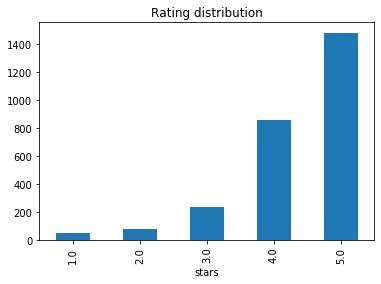

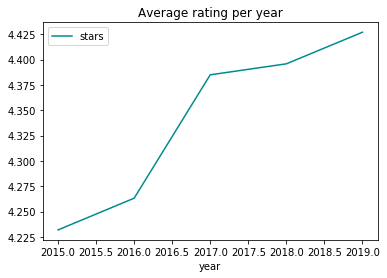

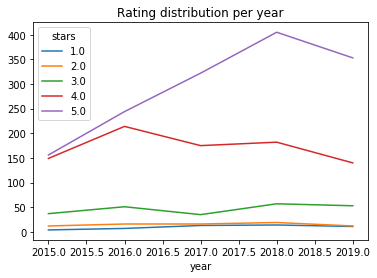

In [32]:
#plot of rating distribion
reviewsPai.groupby(['stars'])['user_id'].count().plot(kind='bar', title = 'Rating distribution')
#plot of avg. rating pr. year

reviewsPai.groupby(['year']).mean().plot(color='#008C8C', title = 'Average rating per year')
#plot of rating distribion pr. year

reviewsPai.groupby(['year','stars'])['business_id'].count().unstack().plot(title = 'Rating distribution per year')

plt.show()

The dip in good reviews is however a product of dip in total reviews, which becomes clear when plotting number of reviews aggregated.

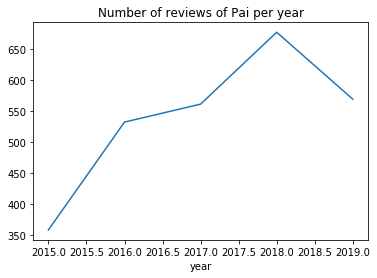

In [33]:
# Aggregated reviews
reviewsPai.groupby(['year'])['user_id'].count().plot(title= "Number of reviews of Pai per year")
plt.show()

The same pattern also appears when looking at number of checkins

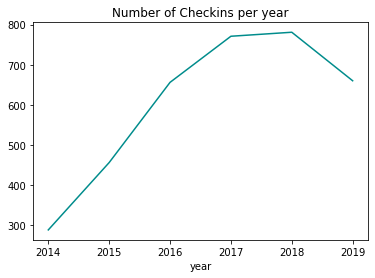

In [34]:
# ckeckin distribution for the past couple of years.
checkin_df.groupby(['year'])['TorontoTime'].count().plot(kind="line", color="#008C8C", title= "Number of Checkins per year")
plt.show()

## Conclusions from Part 1

Already here, some trends become very clear: 
- In general, Pai recieves a lot of great reviews in 4 and 5 stars.  
- The average ratings increased drastically from 2016 to 2017, and are still going upwards
- It appears as if the number of 4 and 5 star reviews have declined from 2018 to 2019. However, the amount of reviews have declined (as seen in the rating distribution)

# Part 2: Understanding topics in reviews through text analysis

Pai is one of the most reviewed restaurants, and many reviews contain very long and perosnal stories of great (and less great) experiences and insights - however, due to the large amount of data, it would be beneficial to spot trends and themes that occur many times. Text analysis is a broad term, that in general narrows down to exactly it's definition - analyzing text. However, there are varying degrees of maturity, and with more data more advanved methods can prove beneficial. 

Before initializing a text analysis, we must first cleanse the text thoroughly. 

First, standard words from the english vocabulary are removed using textprocessing

In [63]:
# Definint Standard Stopwords
extended_stopwords = stop_words.ENGLISH_STOP_WORDS.union(['come','order','try','go','get','make',
                                                     'drink','plate','dish','restaurant','place',
                                                     'would','really','like','great','service','came',
                                                     'got','toronto','just','good','best',
                                                     'amazing','dont','didnt','bad','definitely',
                                                     'delicious', 'thai', 'food', 'restaurants'])

#Function for cleansing text based on stop words
def cleanse(text):
    # Lastly, remove stopwords
    text = " ".join([letter for letter in text.split() 
                     if letter not in extended_stopwords])
    
    # Remove punctuation 
    text = "".join([letter for letter in text 
                    if letter not in string.punctuation])
    
    # Set all to lowercase
    text = "".join([letter.lower() for letter in text])
    
    return text

In [36]:
# Creating a column for cleansed text
positive_rw['clean text'] = positive_rw['text'].apply(cleanse)
negative_rw['clean text'] = negative_rw['text'].apply(cleanse)

The text is now cleared of general words and cleansed for gramatical and syntactical elements that might disturb analysis. 

As mentioned, the amount of statements are large, and simple models may not unveil the general topics that reccur throught the data.

A very simple method of text analysis - word clouds - give a very brief overview of the general theme in good and bad reviews. 

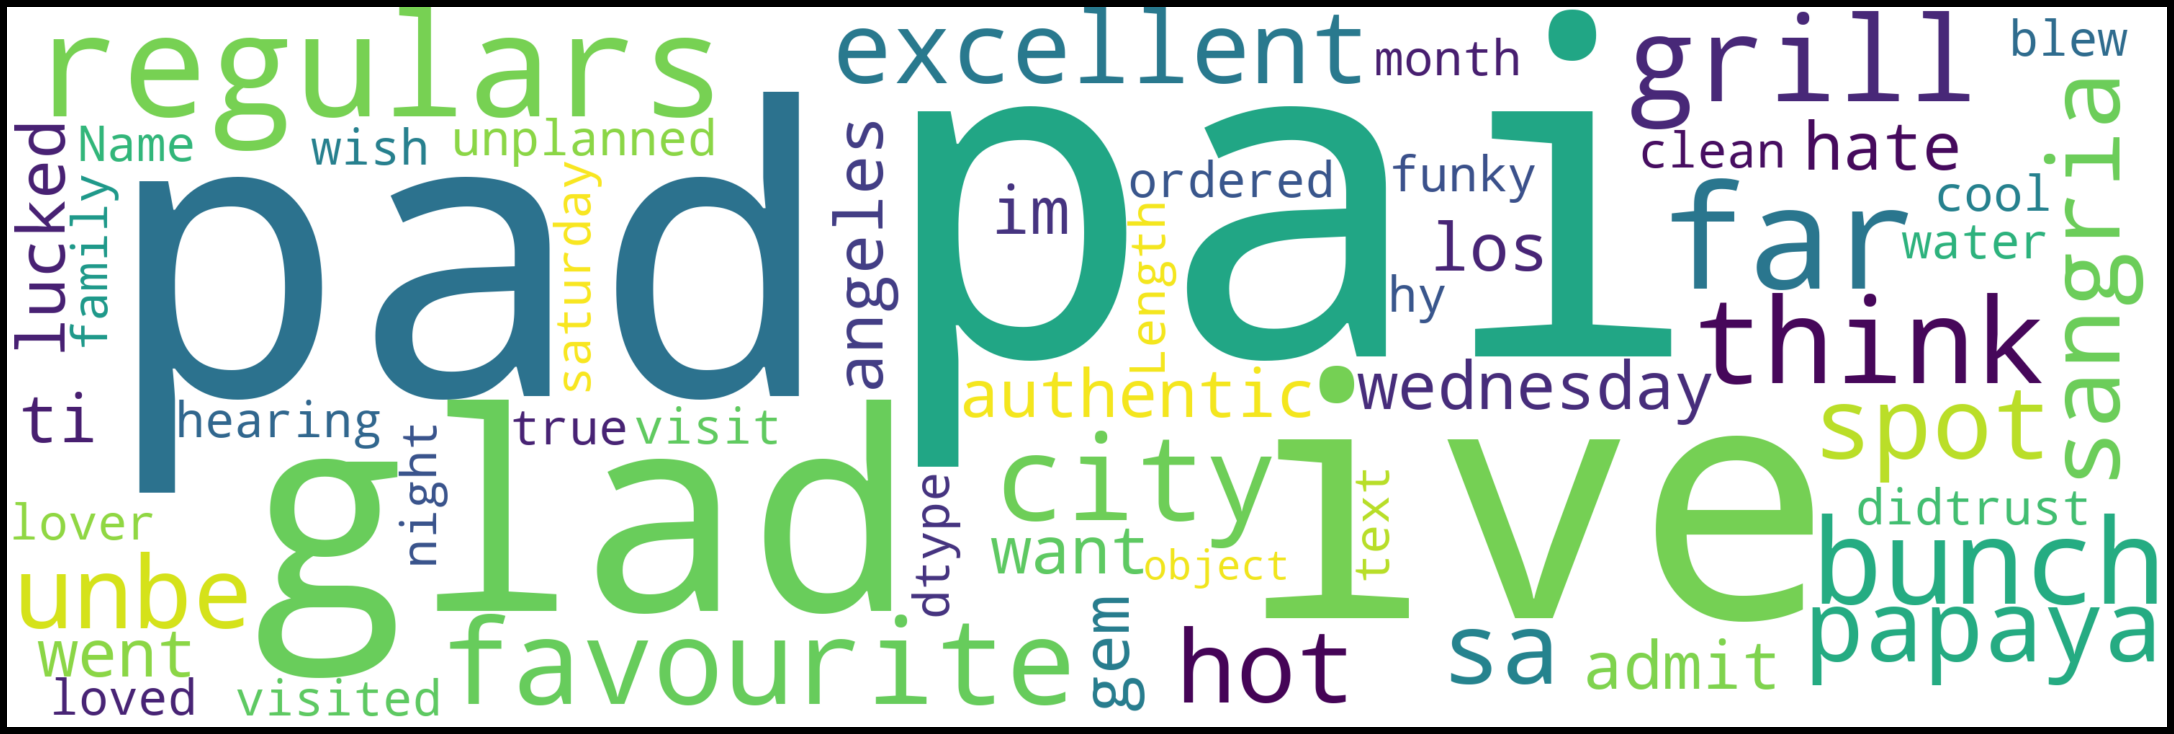

In [38]:
#using negative cleansed text
positivetext = positive_rw['clean text']

#initializing the wordcloud
wordcloud = WordCloud(
    width = 3000,
    height = 1000,
    background_color = 'white',
    stopwords = extended_stopwords).generate(str(positivetext))

#setting size of skewer
fig = plt.figure(
    figsize = (30, 30),
    facecolor = 'k',
    edgecolor = 'k')

# setting up the wordcloud plot
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

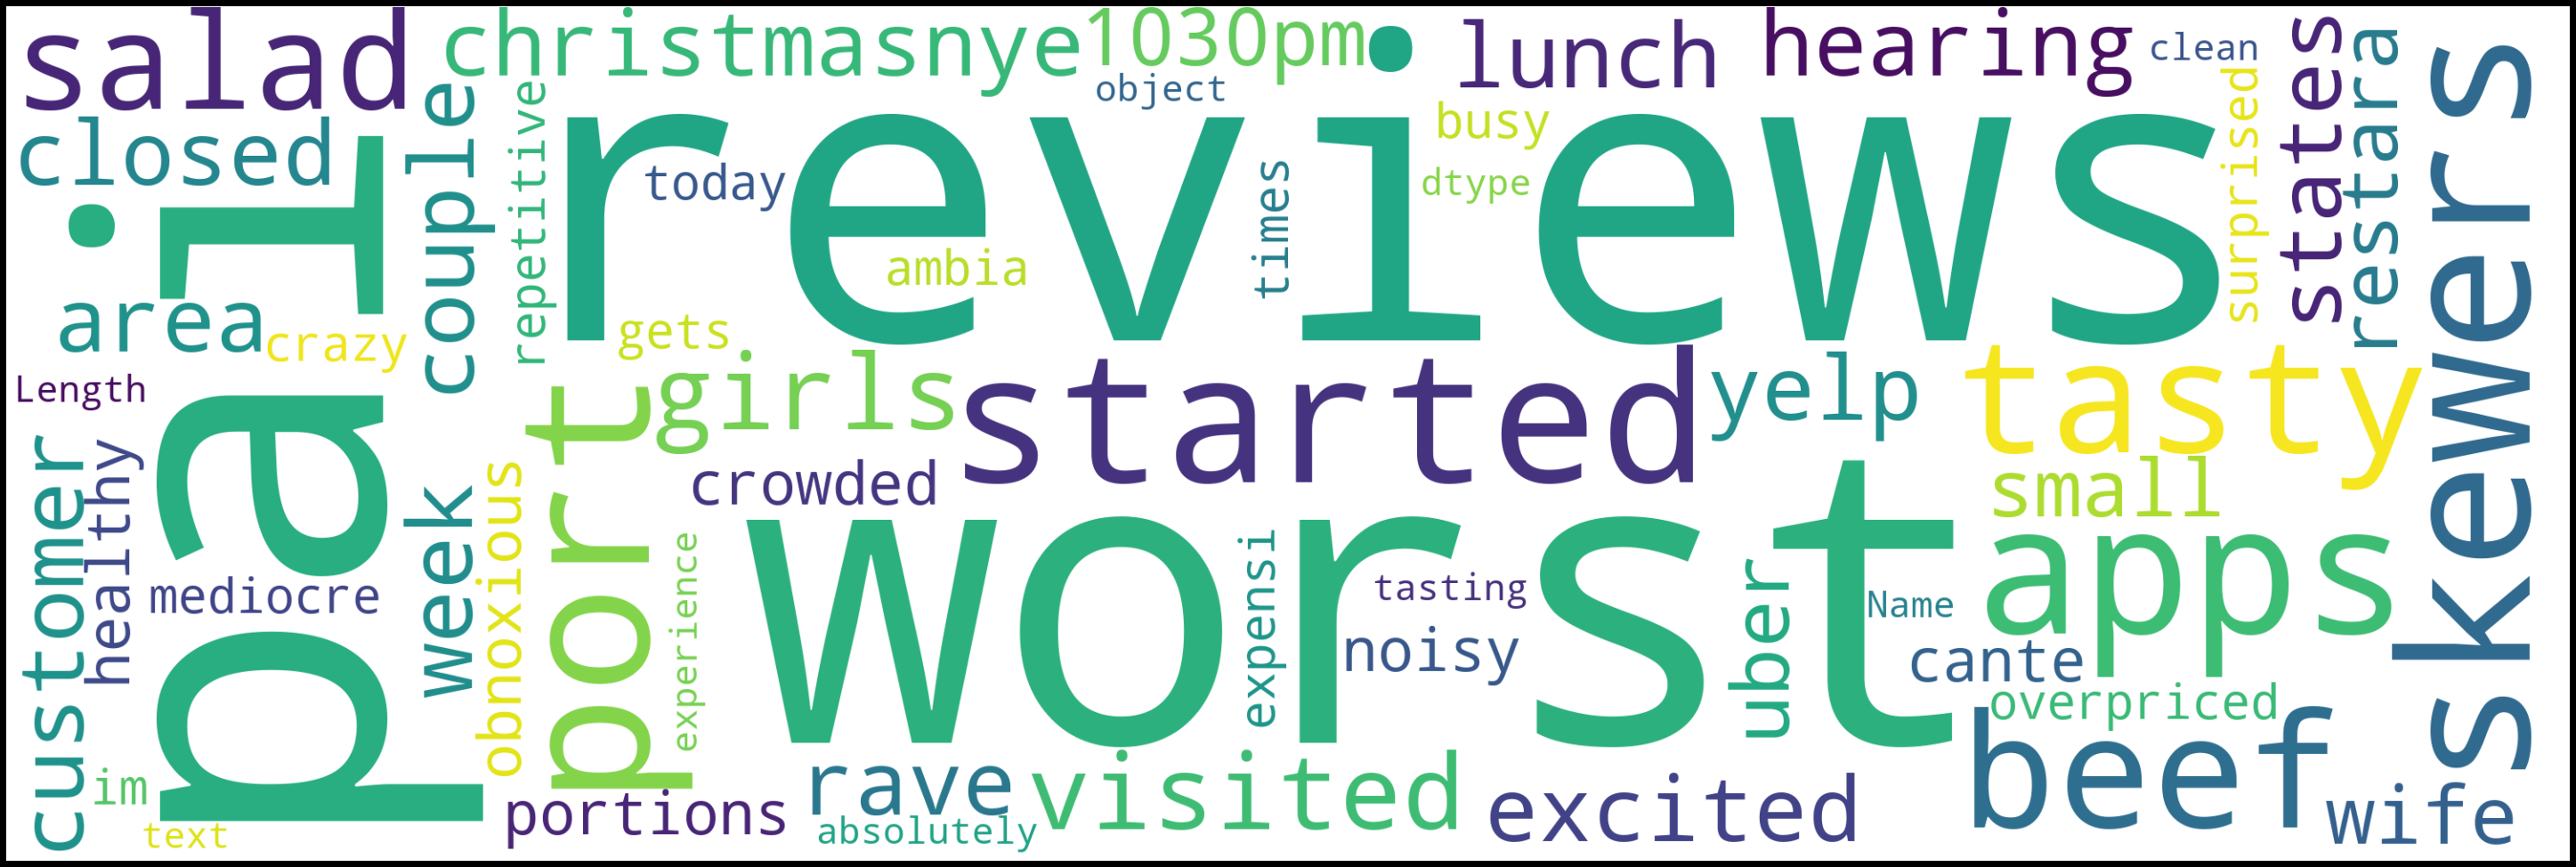

In [40]:
#using negative cleansed text
negativetext = negative_rw['clean text']

#initializing the wordcloud
wordcloud = WordCloud(
    width = 3000,
    height = 1000,
    background_color = 'white',
    stopwords = extended_stopwords).generate(str(negativetext))

#setting size of skewer
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

# setting up the wordcloud plot
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

However, the general topics are to be uncovered. To do this, mor advanced mathematical models can help cluster general themes. Specifically, Topic Modelling might be good to spot trends that occur often in the broad set of reviews. 

Topic Modelling is an unsupervised machine learning mehtodology to understand topics (trends/patterns) in language by applying Natural Language Processing to strings and clustering patterns. Topic Modelling uses non-negative matrix factorization to apply weight to different words that occur in the same patterns, and by looking at the words that figure together we as humans can make assumptions on what the theme is actually about for the specific case. 

We must first tokenize the text, which is done using a vectorizer from SKLearn. 

In [42]:
# Transformations here are done using the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Positive Vectors
tfidf_transformer_p = TfidfVectorizer(min_df=10, max_df=0.5)
p_vectors = positive_rw['clean text']
p_vectors = tfidf_transformer_p.fit_transform(p_vectors)

#Negative Vectors
tfidf_transformer_n = TfidfVectorizer(min_df=10, max_df=0.5)
n_vectors = negative_rw['clean text']
n_vectors = tfidf_transformer_n.fit_transform(n_vectors)

### NMF Topic modelling
Printing and cleansing function is inspired by: https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

In [47]:
# Defining number of topics
topics = 5

# NMF analysis of the topics
nmf_p = NMF(n_components=topics)
nmf_n = NMF(n_components=topics)

# Weights for the vectors
W_n   = nmf_n.fit_transform(n_vectors) 
W_p   = nmf_p.fit_transform(p_vectors)

#######################
### LAMBDA FUNCTION ###
#######################

# inputs are: type of model (positive/negative) - vectorizer - number of topics to see - number of words to show
def print_topics(model, vectorizer, no_topics, no_top_words):
    for id_, topic in enumerate(model.components_):
        if id_ < no_topics:
            print(id_)
            print([(vectorizer.get_feature_names()[i], "{:.1f}".format(topic[i]))
                        for i in topic.argsort()[:-no_top_words - 1:-1]]) 
            print()

To spot general trends, we will limit the analysis a bit - specifically to 5 modelled topics and the 10 top words for each topic for the positive reviews

In [48]:
topics = 5
top_words = 10

The print-function can then show the 10 words describing the 5 most common patterns:

In [49]:
print_topics(nmf_p, tfidf_transformer_p, topics, top_words)

0
[('pad', '0.9'), ('we', '0.9'), ('spicy', '0.6'), ('ordered', '0.5'), ('it', '0.5'), ('chicken', '0.4'), ('sauce', '0.4'), ('rice', '0.4'), ('fried', '0.4'), ('spice', '0.4')]

1
[('food', '1.1'), ('great', '0.9'), ('atmosphere', '0.6'), ('service', '0.5'), ('staff', '0.3'), ('excellent', '0.3'), ('friendly', '0.3'), ('recommend', '0.3'), ('amazing', '0.3'), ('awesome', '0.3')]

2
[('curry', '1.5'), ('green', '1.1'), ('coconut', '1.0'), ('chicken', '0.3'), ('served', '0.3'), ('rice', '0.3'), ('love', '0.3'), ('sticky', '0.2'), ('amazing', '0.2'), ('mango', '0.2')]

3
[('khao', '1.2'), ('soi', '1.0'), ('beef', '0.5'), ('san', '0.5'), ('road', '0.4'), ('pai', '0.4'), ('braised', '0.3'), ('noodles', '0.3'), ('tea', '0.2'), ('pad', '0.2')]

4
[('wait', '0.9'), ('its', '0.8'), ('ive', '0.6'), ('time', '0.6'), ('worth', '0.5'), ('long', '0.5'), ('busy', '0.5'), ('toronto', '0.4'), ('this', '0.4'), ('it', '0.4')]



When all the positive reviews has been modelled, these are the 5 best describing topics.

After a detailed look on the top words in each topic, I would say the six poritice topics is about the following: 

- **Topic 0** Most likely a dish ordered, fried rice with chicken or shrimp and a spicy sauce. 
- **Topic 1** Worth the wait, but long time in line. Busy and line also figure. 
- **Topic 2** More about what was served, most likely a dish with chicken, curry, green and coconut. 
- **Topic 3** Lots of postive adjectives concerning the atmosphere and staff: love, recommend, awesome and authentic 
- **Topic 4** Most likely another sidh, noodle, tender, beef, brasied and noodle figure. Also Khao Soi. 

Printing the 5 modelled topics and the 10 top words for each topic for the negative reviews

In [50]:
#prints the negative topics
print_topics(nmf_n, tfidf_transformer_n, topics, top_words)

0
[('wait', '0.6'), ('table', '0.5'), ('food', '0.5'), ('long', '0.5'), ('said', '0.4'), ('we', '0.4'), ('server', '0.4'), ('waiting', '0.3'), ('waited', '0.3'), ('minutes', '0.3')]

1
[('thai', '0.8'), ('pad', '0.7'), ('chicken', '0.4'), ('good', '0.2'), ('rice', '0.2'), ('food', '0.2'), ('noodles', '0.2'), ('taste', '0.2'), ('way', '0.2'), ('had', '0.2')]

2
[('it', '1.1'), ('curry', '0.4'), ('sauce', '0.2'), ('eat', '0.2'), ('didnt', '0.2'), ('green', '0.2'), ('asked', '0.2'), ('nice', '0.1'), ('meal', '0.1'), ('coconut', '0.1')]

3
[('soup', '0.6'), ('tom', '0.5'), ('yum', '0.5'), ('sweet', '0.4'), ('beef', '0.3'), ('curry', '0.3'), ('noodles', '0.2'), ('way', '0.2'), ('ordered', '0.2'), ('not', '0.2')]

4
[('its', '0.6'), ('pai', '0.5'), ('this', '0.3'), ('times', '0.3'), ('lunch', '0.3'), ('menu', '0.3'), ('disappointed', '0.3'), ('khao', '0.2'), ('time', '0.2'), ('review', '0.2')]



After a detailed look on the top words in each topic, I would say the five negative topics is about the following: 

- **Topic 0** seems to be about the staff, table and customer relationship. The words asked, want and ordered also figures - so possibly something relating to not getting what was ordered. 
- **Topic 1** seems to be about a dish with rice, sauce and chicken (the words pad and khao are also included, maybe indicating the specific dish.  
- **Topic 2** seems to be about the experience - overall, avergae, better and small are present. Also the word review figures - maybe indicating a reason for going. 
- **Topic 3** Is about another dish, a soup in particular. 
- **Topic 4** Is a fourth dish - with curry, and most likely at lunch. Even includes the words worst, quality, and disapointed. 

## Part 2 conclusions
There are some very clear patterns in both positive and negative reviews. 

Some dishes are very highly appreciated, while it appears that some get bad reviews often. 

Other than that, the wait seems worth the wait - even though no one likes to wait - and the atmosphere is highly praised. 

# Part 3: Opening Hours
Another element to dive into is the opening hours of the restaurant, specifically if (or when) the restaurant could use more customers. 

This could be a good first place to start - gaining more traction in less busy hours would not require more manpower, but improve flow of ingredients and income, as well as keep the staff busy. 

In [52]:
#date of first ever check-in to the restaurant
date_start = datetime(2015,1,1) 

#date of last avaiable check-in to the restaurant
date_end = datetime(2018,12,12) 

days = pd.date_range(date_start, date_end, freq='D') #set frequence to days
df = pd.DataFrame({'datetime': days}) #naming column header

Just for reference, the listed opening hours per Yelp are: 

In [53]:
print("Opening hours: ", business_df[business_df['business_id'] == restaurantID ].hours.values)

Opening hours:  [{'Monday': '11:30-22:0', 'Tuesday': '11:30-22:0', 'Wednesday': '11:30-22:0', 'Thursday': '11:30-22:0', 'Friday': '11:30-22:30', 'Saturday': '11:30-22:30', 'Sunday': '15:0-22:0'}]


### Check-in analysis

The average checkins are computed for usage with in a seaborn-heatmap. 

This will provide a clear overview of patterns before further investigations. 

In [54]:
# Initially, the average checkins are investigated
Avg_checkins=checkin_df.groupby(['weekday','hour'])['TorontoTime'].count()
Avg_checkins=Avg_checkins/len(Avg_checkins)

A matrix is created to form the heatmap

In [55]:
# Creating Weekday x Hours matrix, and visualizing it together with maximum daily values.

# Initializing data frame 
Avg_checkins = pd.DataFrame(Avg_checkins)
Avg_checkins["mean checkins"] = Avg_checkins["TorontoTime"]
Avg_checkins=Avg_checkins.reset_index()

# Concering into matrix
Avg_checkins=Avg_checkins.pivot(index='hour',columns='weekday')[['mean checkins']]

#Isterting 0 instead of NaN values
# renaming the columns to be the name of the weekday
Avg_checkins = Avg_checkins.rename(columns={0: "Monday", 1: "Tuesday", 2: "Wednesday"
                             , 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"})

# Lastly removing NaN 
Avg_checkins = Avg_checkins.fillna(0)

# Generating heatmap with seaborn
cm = sns.light_palette("green", as_cmap=True)
s = Avg_checkins.style.background_gradient(cmap=cm)
s

A pattern is quite clear, around lunch and dinnertime. 

This pattern is also clear in a general distribution of visitors per hours with individual days as legends

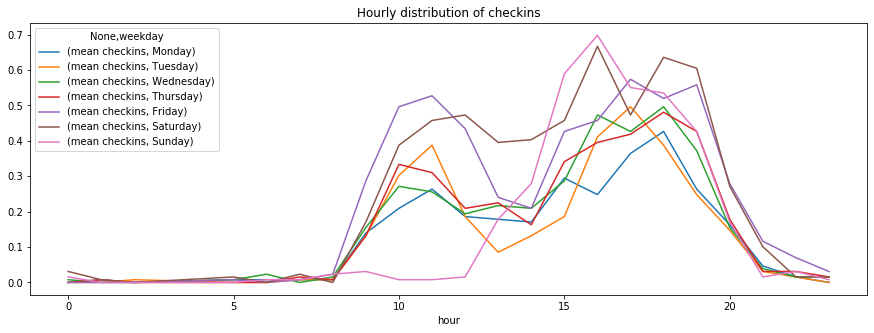

In [57]:
#plotting the result as well:
Avg_checkins.plot(kind="line", figsize=(15,5),title="Hourly distribution of checkins")
plt.show()

The larges outlier seems to be Sunday - but refering back to the published openinghours, the restaurant does not open before 3pm on Sundays, which makes sense of the outlier. 

## Seasonality in checkins

Another discrete element to analyze is the seasonality of the restaurant. It might be interesting to investigate if campaigns should be directed at a specific period of time

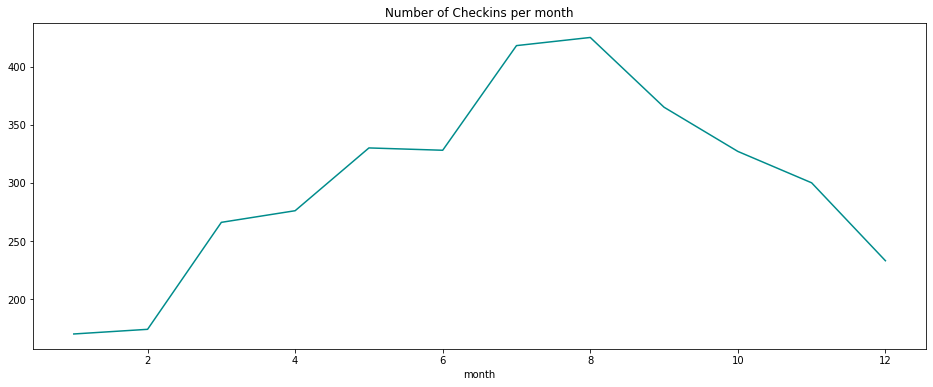

In [58]:
#monthly ckeckin distribution.
checkin_df.groupby(['month'])['TorontoTime'].count().plot(figsize=(16, 6), kind="line", color="#008C8C", title= "Number of Checkins per month")
plt.show()

A pattern becomes clear - a lot more checkins happen in the summermonths, with rapid decline over winter. 

Perhaps a seasonal campaign could attract more costumers? 

Lets look at another seasonality-trend - average reviews per month. 

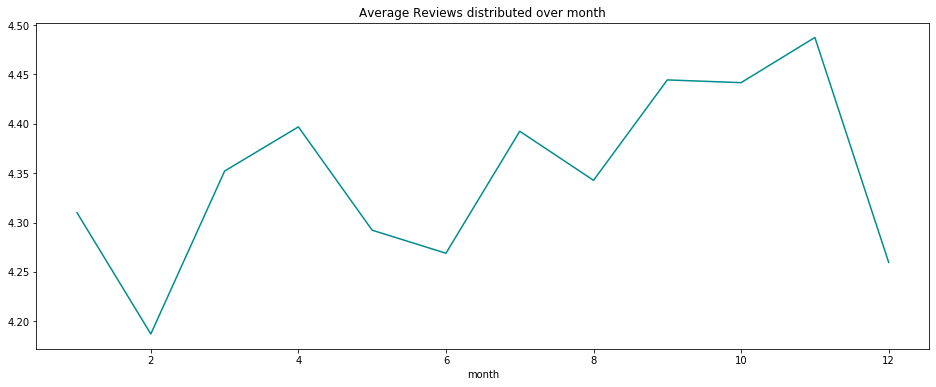

In [59]:
#monthly ckeckin distribution.
reviewsPai['month'] = reviewsPai['datetime'].dt.month
reviewsPai.groupby(['month'])['stars'].mean().plot(figsize=(16, 6), kind="line", color="#008C8C", title= "Average Reviews distributed over month")

This also reveals an interesting finding. Reviews are higher in persiods when the restaurant is not peak busy - maybe because the personel is very busy, based on some of the topics found in the NMF-modelling.

### Part 3 conclusions: 
Pai is definetly busiest around noon and dinner, which makes sense with regular eating patterns. However, if afternoon guests could be lured into the shop, profit could possibly be made. 

Pai seems to be a very seasonal place, with a lot more visitors during summer. However, the average ratings seem to dip slightly when the restaurant is busiest. 

If thi mismatch could be fixed, the restaurant would most likely improve their reviews. 

# Part 4: potential areas to open new restaurants
With so good reviews on Yelp, and concrete areas to focus on, it may be of the business' interest to look into opening a new spot. 

Therefore, we will look at the potential places to open new spots.


In [60]:
# Initializing Heat Map
hMap = folium.Map([43.651070, -79.3470157], tiles = "Stamen Toner", zoom_start=11)

# Adding all business lications to dataframe
businesslocations = toronto_business[['latitude', 'longitude']]
businesslocations = businesslocations.dropna(axis=0, subset=['latitude', 'longitude'])

# Mapping all businesslocations out
businesslocations = [[row['latitude'],row['longitude']] for index, row in businesslocations.iterrows()]

# Adding all business locations to heat map
HeatMap(businesslocations,radius=11, max_zoom=12).add_to(hMap)

# Adding Pai to the map
folium.Marker([43.647830, -79.389182], popup='Pai Northern Thai Kitchen').add_to(hMap)

# Printing
hMap

It becomes quite clear, that the restaurant is located in one of the most heavily trafficated areas - most likely what is considered downtown. 

Therefore, looking for new places to open based only on geography, it may be interesting to look into new areas - possibly areas with not as many positive reviews. 

We can also dive into interesting areas where restaurants get low reviews at times during Pai's slow hours - these could be great potential customers to lure into Pai for a great experience.  

In [61]:
# Filtering on low reviews
lowreviews = toronto_business[toronto_business['stars'] >4]

In [62]:
# Initializing Heat Map
hMapLow = folium.Map([43.651070, -79.3470157], tiles = "Stamen Toner", zoom_start=11)

# Adding all business lications to dataframe
businesslocationsLow = lowreviews[['latitude', 'longitude']]
businesslocationsLow = businesslocationsLow.dropna(axis=0, subset=['latitude', 'longitude'])

# Mapping all businesslocations out
businesslocationsLow = [[row['latitude'],row['longitude']] for index, row in businesslocationsLow.iterrows()]

# Adding all business locations to heat map
HeatMap(businesslocationsLow,radius=11, max_zoom=12).add_to(hMapLow)

# Adding Pai to the map
folium.Marker([43.647830, -79.389182], popup='Pai Northern Thai Kitchen').add_to(hMapLow)

# Printing
hMapLow

## Part 4 Conclusions
Comparing the two maps, it is clear that the upper areas of Toronto contains plenty of business', but not a lot of high rated business' activity. It may be of interest for Pai to consider gaining market there. 

# General Conclusions
In general, it is clear that Pai is doing well. Good reviews that have improved over the years, backed with plenty of great praise. 

However, the restaurant also has some areas with room for improvement. Some dishes seem to generate bad reviews on a general basis, and reviews dip when the restaurant is busiest. 

A short look into the dining-scene of Toronto shows that most great dining experiences are centered around Pai. If there is capital to open a second shop, looking away from downtown might provide new business opportunities. 

# Further Analysis
If I were to continue working on this analysis, I would investigate the close competitors (both in attributes and category) more, to get a better understanding of what they may be doing differently compared to Pai. 

Also, prediction on customers in the coming years would be interesting - but I chose not to because of the Covid 19 situation. I could not quite figure out how to include that factor in an interesting and meaningful way, even though I think it would be very interesting. 

Perhaps next year, comparing predictions before the outbreak to actual numbers for individual restaurants as well as the dining scene as a whole could provide some interesting findings. 